# ML-13 Project. Part I

Ниже приведено решение первой части проекта по прогнозированию временных рядов. В практике приведены конкретные шаги, которые необходимо выполнить для получения требуемого результата. Эти шаги указаны ниже по пунктам, после каждого пункта идёт код для его реализации.

Также дополнительно приведены собственные исследования и выводы.

**Формулировка задачи:** Представьте, что вы работаете в государственной компании, предоставляющей анализ экономической ситуации в мире по заказу государства.

Перед вами стоит задача проанализировать ВВП африканской страны Гана. Для этого вам предоставили показатели ВВП Ганы за 62 года. Вам предстоит исследовать временной ряд, изучить его свойства, построить модели и сделать выводы по результатам.

In [21]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

## 1. Первоначальная загрузка и анализ данных

Прочитайте исходный файл с данными. Визуализируйте исходный временной ряд, сделайте первичные выводы о присутствии компонент тренда и сезонности в ряде.

Отложите последние три года из датасета как тестовую выборку для оценки результатов предсказания.

In [25]:
df = pd.read_csv('data/ghana_gdp.zip', index_col=['year'], parse_dates=['year'])
df.rename(columns={'GDP (current US$)':'gdp'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 1960-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gdp     62 non-null     float64
dtypes: float64(1)
memory usage: 992.0 bytes


<Axes: xlabel='year'>

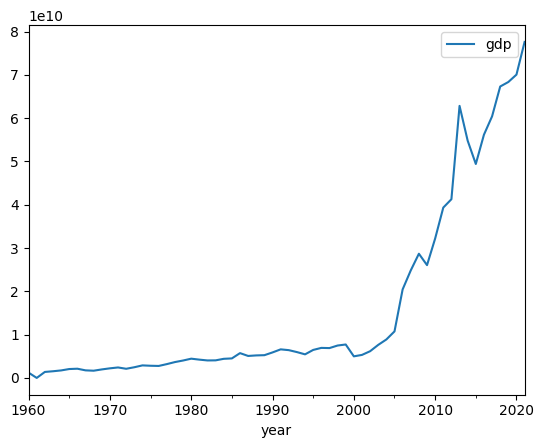

In [27]:
df.plot()

**Первичные выводы:** на графике явно прослеживается общий тренд на увеличение. Причём до 2000 года повышение было малозаметным, после чего произошёл резкий скачок, провисший только в середине 10-х, во время мирового кризиса 14-15 года.

Сезонность на первый взгляд не видна.

Разложим ряд на тренд, сезонность и шум:

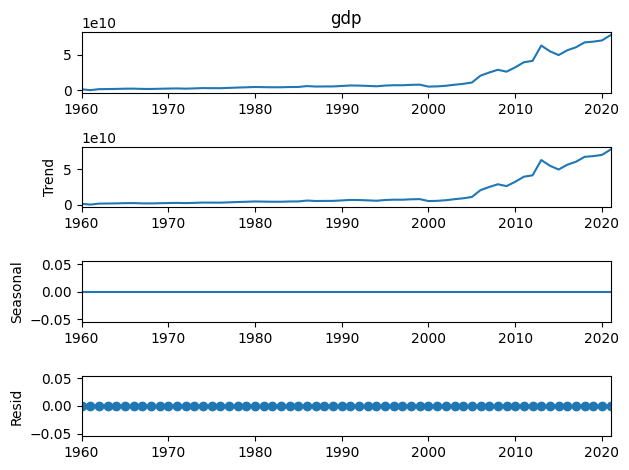

In [30]:
decompos = seasonal_decompose(df.gdp)
decompos.plot()
plt.show()

Как мы видим, наши первоначальные выводы оказались верны: тренд выделен, сезонности нет.

In [31]:
# разделяем выборку на тренировочную и тестовую
train_df = df.iloc[:-3]
test_df = df.iloc[-3:]
print(train_df.shape, test_df.shape)

(59, 1) (3, 1)


## Построение модели скользящего среднего – MA

Постройте модель скользящего среднего, проанализируйте результат. Для построения MA используйте метод `rolling()`, который принимает в качестве параметра размер окна. Используйте среднее как функцию для сглаживания. Ширину окна подберите самостоятельно.

Пример: `train_df.spx.rolling(window=2).mean()`

Визуализируйте исходный временной ряд и построенный с помощью скользящего среднего прогноз, сравните графики между собой и сделайте выводы.